### Random Forest
##### Topluluk öğrenme yöntemleri; birden fazla algoritmanın ya da birden fazla ağacın bir araya gelerek toplu bir şekilde öğrenmesi ve tahmin etmeye çalışmasıdır.

#### Bagging
##### Temeli bootstrap yöntemi ile oluşturulan birden fazla karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.
###### Çalışma prensibinin kilit noktası, bootstrap rastgele örnekleme yöntemidir.
###### Bootstrap rastgele örnekleme yöntemi, gözlem birimlerinin içinden yerine koymalı bir şekilde tekrar tekrar örnek çekmek demektir.
##### Bagging Yöntemi;
###### Hata kareler ortalamasının karekökü değerini düşürür.
###### Doğru sınıflandırma oranını arttırır.
###### Varyansı düşürür ve ezberlemeye karşı dayanıklıdır.

##### Random Forest temeli; birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.
##### Bagging ile Random Subspace yöntemlerinin birleşimi ile oluşmuştur.
###### Bagging(Bootstrap Aggregating): Rastgele örneklemler çekip, bu örneklemlerin her birine model kurup, bunları bir araya getirme yöntemidir.
###### Random Subspace: Bir değişken seti içerisinden rastgele değişken seçme yöntemidir.
##### Ağaçlar için gözlemler bootstrap rastgele örneklem seçim yöntemi ile, değişkenler random subspace yöntemi ile seçilir.
##### Karar ağaının her bir düğümünde en iyi dallara ayrıcı(bilgi kazancı) değişken, tüm değişkenler arasından rastgele seçilen daha az sayıdaki değişken arasından seçilir.
##### Ağaç oluşturmada veri setinin 2/3'ü kullanılır. Dışarıda kalan ağaçların performans değerlendirmesi ve değişken öneminin belirlenmesi için kullanılır.
##### Her düğüm noktasında rastgele değişken seçimi yapılır.(regresyonda p/3, sınıflandırmada karekçk p)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis=1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

#### Model & Prediction

In [7]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train, y_train)

In [8]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

344.8191624908484

In [21]:
rf_params = {"max_depth": [6, 8],
             "max_features": [2, 8],
             "n_estimators": [200, 400, 1200],
             "min_samples_split": [2, 50]}

In [22]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


In [23]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [24]:
rf_model = RandomForestRegressor(random_state = 42,
                                 max_depth = 8,
                                 max_features = 2,
                                 min_samples_split = 2,
                                 n_estimators = 200)
rf_tuned = rf_model.fit(X_train, y_train)

In [26]:
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

349.1649379391149

#### Variable Importance Level

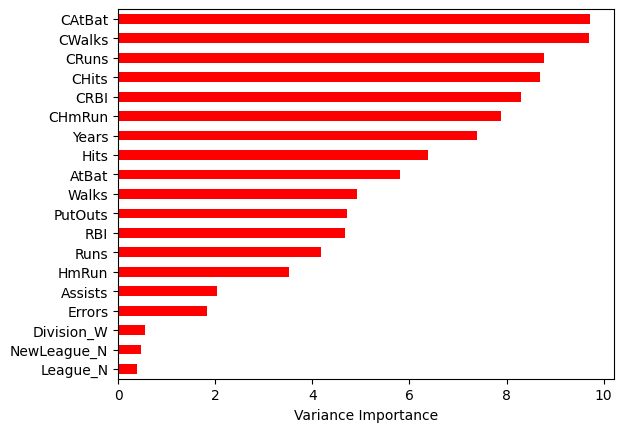

In [29]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                          index = X_train.columns)
Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind = "barh", color = "r")
plt.xlabel("Variance Importance")
plt.gca().legend_ = None